In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'

experience_level - 경력 (EX, SE, MI, EN)

employment_type - 고용 형태 (FT - 정규직, CT - 계약직, PT - 파트 타임)

job_title - 직무

salary_in_usd - 연봉(달러)

employee_residence - 국가(직원)

remote_ratio - 원격 근무 비율

company_location - 국가(회사)

company_size - 회사 규모 (L/S/M)

In [44]:
# 데이터 직무별 연봉 데이터 (출처: Kaggle)
df = pd.read_csv('../data/ds_salaries.csv')
df = df[df['company_location'] == 'US'] # 미국 데이터만 추출
df = df[df['salary_in_usd'] > 15000] # 연봉 15000달러 이하인 데이터는 이상치로 판단하여 제거
df = df[df['employment_type'] == 'FT'] # Full-Time 근무자만 추출
df['salary_in_ko'] = df['salary_in_usd'] * 1309.86 / 10000 # 연봉 달러를 원화로 변환
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_ko
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L,29105.0892
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,17814.0960
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,19268.0406
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M,11880.4302
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M,17028.1800
...,...,...,...,...,...,...,...,...,...,...,...,...
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,55407.0780
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L,21612.6900
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,53966.2320
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,19778.8860


In [46]:
# 4가지 대표 분야로 직무 분류
job_mapping = {
    "Data Analyst": ['Data Analyst', 'Product Data Analyst', 'Business Data Analyst', 'Principal Data Analyst', 'BI Data Analyst', 'Financial Data Analyst'],
    "Data Scientist": ['Data Scientist', 'Lead Data Scientist', 'Principal Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    "ML Engineer": ['Machine Learning Developer', 'ML Engineer', 'Machine Learning Manager', 'Machine Learning Infrastructure Engineer', 'Machine Learning Software Engineer', 'Machine Learning Researcher', 'Machine Learning Engineer', 'Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Applied Machine Learning Scientist'],
    "Data Engineer": ['Cloud Database Engineer', 'Data Infrastructure Engineer', 'Big Data Engineer', 'Data Engineer', 'Principal Data Engineer', 'Cloud Data Engineer', 'Lead Data Engineer'],
}

def job_title_mapping(job_title):
    for key, value in job_mapping.items():
        if job_title in value:
            return key
    return np.nan
df['job_title'] = df['job_title'].apply(job_title_mapping)
df.dropna(subset=['job_title'], inplace=True)

In [32]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
12,2023,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M
17,2023,SE,FT,Data Scientist,170000,USD,170000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3747,2021,MI,FT,ML Engineer,423000,USD,423000,US,50,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Data Scientist,151000,USD,151000,US,100,US,L


1. 경력에 따른 연봉 차이

2. 회사 규모에 따른 연봉 차이

3. 원격 근무 비율이 연봉에 영향을 미치는가

4. 데이터 직무에 따른 연봉 차이

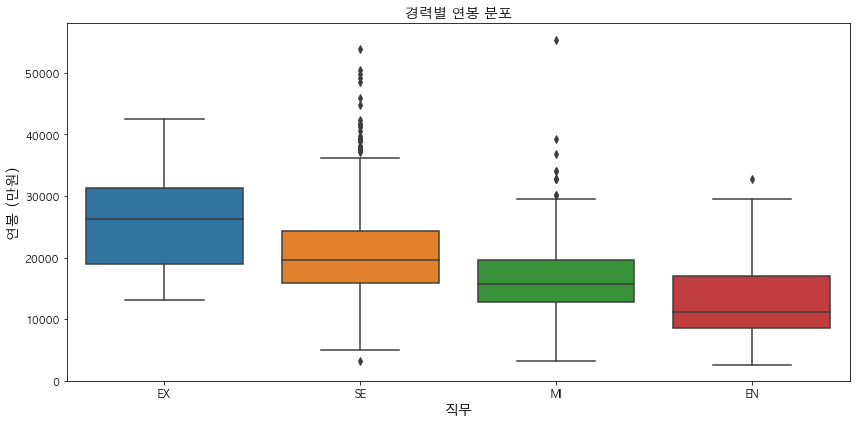

In [61]:
# 경력에 따른 연봉 차이 - boxplot
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_ko', order=['EX', 'SE', 'MI', 'EN'])
plt.title('경력별 연봉 분포', fontsize=14)
plt.xlabel('직무', fontsize=14)
plt.ylabel('연봉 (만원)', fontsize=14)
plt.tight_layout()
plt.show()

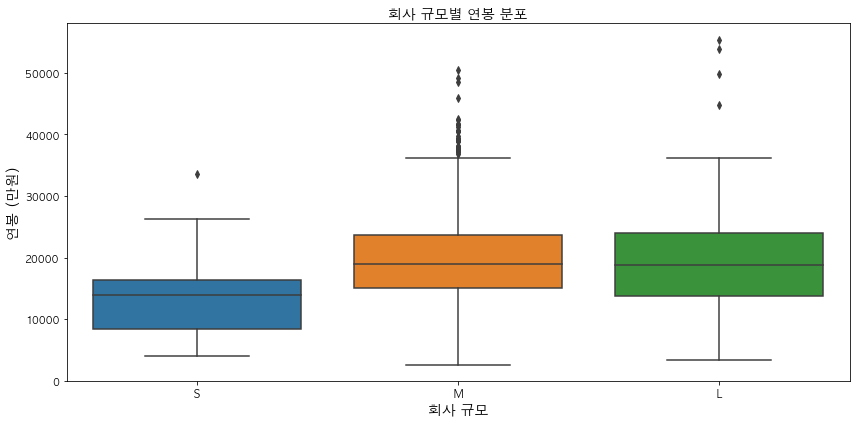

In [68]:
# 회사 규모에 따른 연봉 차이
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_ko', order=['S', 'M', 'L'])
plt.title('회사 규모별 연봉 분포', fontsize=14)
plt.xlabel('회사 규모', fontsize=14)
plt.ylabel('연봉 (만원)', fontsize=14)
plt.tight_layout()
plt.show()

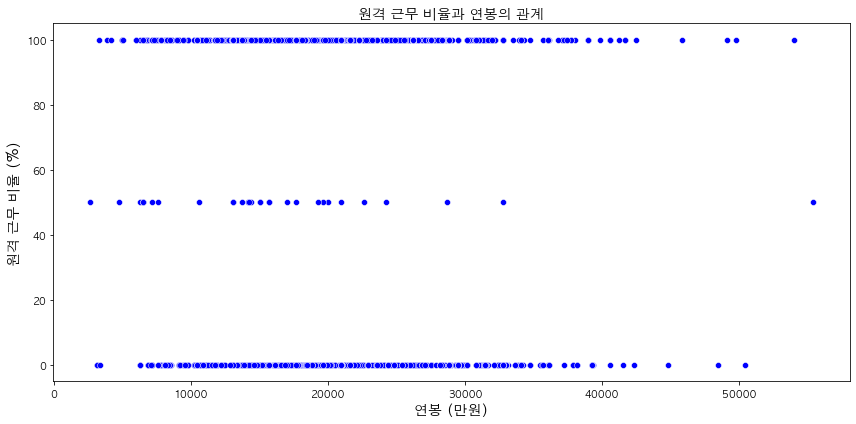

In [88]:
# 원격 근무 비율에 따른 연봉 차이

fig = plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='salary_in_ko', y='remote_ratio', color='blue')
plt.xlabel('연봉 (만원)', fontsize=14)
plt.ylabel('원격 근무 비율 (%)', fontsize=14)
plt.title('원격 근무 비율과 연봉의 관계', fontsize=14)
plt.tight_layout()
plt.show()

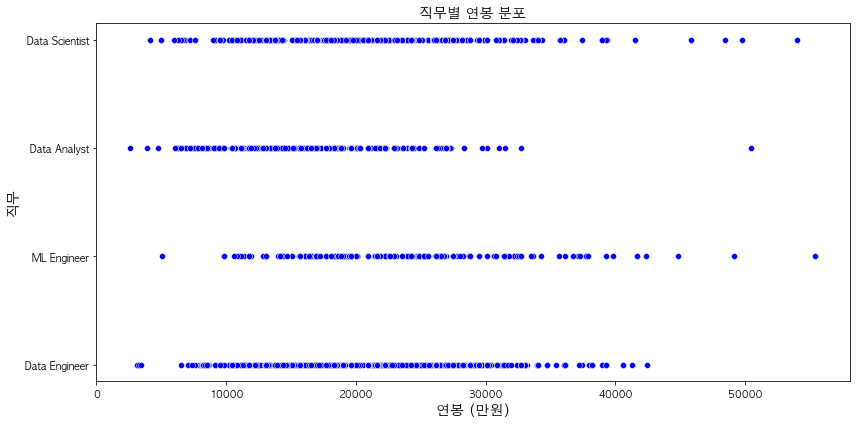

In [89]:
# 직무에 따른 연봉 차이
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='salary_in_ko', y='job_title', color='blue')
plt.title('직무별 연봉 분포', fontsize=14)
plt.xlabel('연봉 (만원)', fontsize=14)
plt.ylabel('직무', fontsize=14)
plt.tight_layout()
plt.show()

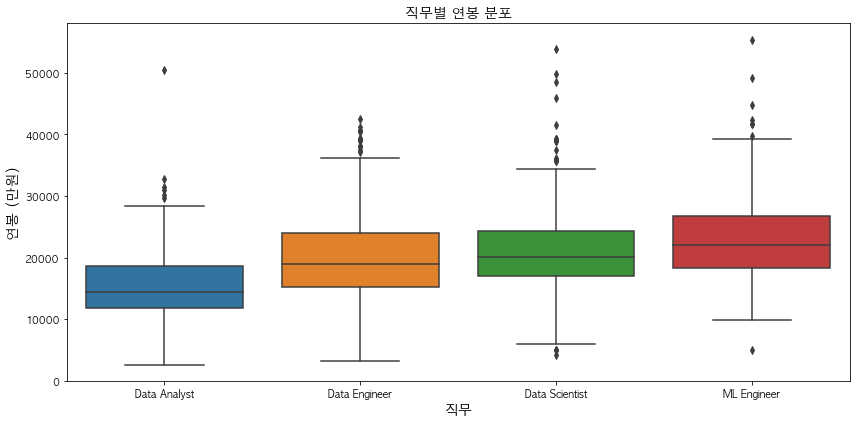

In [93]:
# 직무에 따른 연봉 차이 - boxplot
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_title', y='salary_in_ko', order=['Data Analyst','Data Engineer', 'Data Scientist',  'ML Engineer'])
plt.title('직무별 연봉 분포', fontsize=14)
plt.xlabel('직무', fontsize=14)
plt.ylabel('연봉 (만원)', fontsize=14)
plt.tight_layout()
plt.show()


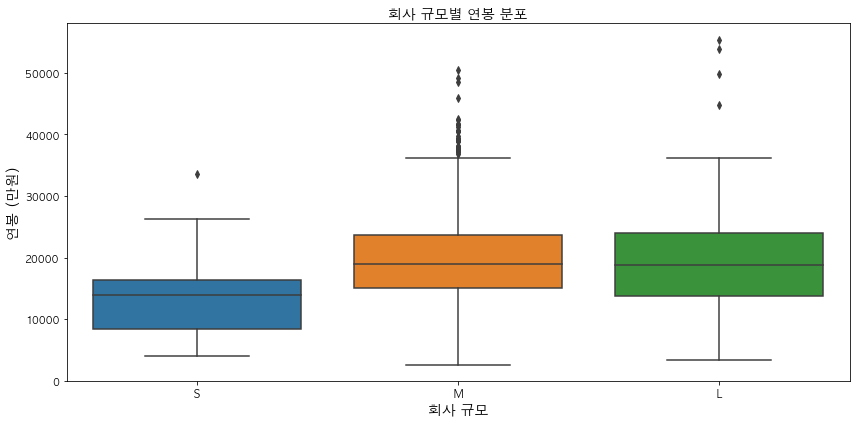

## 결론

데이터 분석 결과, 원격 근무 여부를 제외한 경력, 규모, 직무에 따른 연봉 차이가 두드러지게 나타났다. 

